# Research On Bangladesh Used Cars Using Different Machine Learning Models

In [1]:
# Assigning Dataset Path

dt = 'CarData.csv'  ## Place your Dataset Path Here

## Importing packages

In [2]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.svm import SVR #SVR 
from sklearn.linear_model import Ridge #Ridge
from sklearn.linear_model import ElasticNet # Elastic Net
from sklearn.linear_model import Lasso #Lasso

from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from statistics import stdev
from warnings import simplefilter #Filtering warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
d1 = pd.read_csv(dt,encoding='latin-1') # Here df is a data frame

In [4]:
# The first 15 data of the dataset
d1.head(7)

,car_name,brand,car_model,registration,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota Vitz 2012,Toyota,Vitz,2016,2012,Automatic,Hatchback,Octane,1300,45000,1392000.0
1,Toyota Hiace AMBULANCE 2015,Toyota,Hiace,2017,2015,Automatic,MPV,Petrol,1500,60000,1125200.0
2,Toyota Hiace GL 2016,Toyota,Hiace,2018,2016,Automatic,MPV,"Petrol, Octane",2000,46810,2668000.0
3,Toyota Hiace 2016,Toyota,Hiace,2018,2016,Automatic,MPV,Octane,2000,45557,3306000.0
4,Toyota Prius S 2016,Toyota,Prius,2018,2016,Automatic,Saloon,"Petrol, Hybrid, Octane",1800,21065,2898840.0
5,Honda Vezel RS Pacag Octan Drive 2016,Honda,Vezel,2016,2016,Automatic,Estate,Octane,1500,52314,2375000.0
6,Toyota Axio G 2013,Toyota,Axio,2017,2013,Automatic,Saloon,"CNG, Octane",1500,45300,1676200.0


In [5]:
d1.shape

(1499, 11)

In [6]:
d1.columns

Index(['car_name', 'brand', 'car_model', 'registration', 'model_year',
       'transmission', 'body_type', 'fuel_type', 'engine_capacity',
       'kilometers_run', 'price'],
      dtype='object')

In [7]:
d1.nunique()

car_name           964
brand               26
car_model          149
registration        35
model_year          36
transmission         2
body_type           12
fuel_type           30
engine_capacity     58
kilometers_run     750
price              704
dtype: int64

In [8]:
d1.nunique()

car_name           964
brand               26
car_model          149
registration        35
model_year          36
transmission         2
body_type           12
fuel_type           30
engine_capacity     58
kilometers_run     750
price              704
dtype: int64

## Exploratory Data Analysis

In [9]:
# Dropping the car_name attribute since it is not required
d2 = d1.drop(['car_name'],axis=1)
d2.head()

,brand,car_model,registration,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Vitz,2016,2012,Automatic,Hatchback,Octane,1300,45000,1392000.0
1,Toyota,Hiace,2017,2015,Automatic,MPV,Petrol,1500,60000,1125200.0
2,Toyota,Hiace,2018,2016,Automatic,MPV,"Petrol, Octane",2000,46810,2668000.0
3,Toyota,Hiace,2018,2016,Automatic,MPV,Octane,2000,45557,3306000.0
4,Toyota,Prius,2018,2016,Automatic,Saloon,"Petrol, Hybrid, Octane",1800,21065,2898840.0


In [10]:
#checking for any null values present or not!
d2.isnull().any()

brand              False
car_model          False
registration       False
model_year         False
transmission       False
body_type          False
fuel_type          False
engine_capacity    False
kilometers_run     False
price              False
dtype: bool

In [11]:
# method 2
d2.isnull().sum() # We don't have any null values here since we have collected the dataset manually

brand              0
car_model          0
registration       0
model_year         0
transmission       0
body_type          0
fuel_type          0
engine_capacity    0
kilometers_run     0
price              0
dtype: int64

## Data Consistency Check

In [12]:
d2.nunique()

brand               26
car_model          149
registration        35
model_year          36
transmission         2
body_type           12
fuel_type           30
engine_capacity     58
kilometers_run     750
price              704
dtype: int64

In [13]:
d2.car_model.unique()

array(['Vitz', 'Hiace', 'Prius', 'Vezel', 'Axio', 'Corolla', '520d',
       'Harrier', 'Aqua', 'Premio', 'Prado', 'Allion', 'Grace',
       'Outlandar', 'Corsa', 'Fielder', 'Noah', 'Eco Sport',
       'Land Cruiser', 'Carryboy', 'Swift', 'Accent', 'Civic', 'Sienta',
       'Bluebird', 'RX-8', 'X-Trail', '3 Series', 'Probox', 'APV',
       '7 Series', 'C-HR', 'Starlet', 'H2', 'Fit', 'Pajero', 'RAV4',
       'Esquire', 'Sunny', 'CR-Z', 'M3', 'Sprinter', 'XJ', 'Succeed',
       'Voltz', 'Camry', 'Avanza', 'Corona', 'Mahindra', 'X5', 'RX',
       'Sportage', 'C-Class', 'Rush', 'Alphard', 'LiteAce', 'Rocky',
       'Carina', 'CR-V', 'Indigo Ecs', 'Axela', 'RunX', 'Mark II', 'Raum',
       '5 Series', 'Estima', 'Juke', 'ist', 'Insight', 'Lancer', 'Tiida',
       'HR-V', 'X Assista', 'Jeep', 'Kluger', 'Tucson', 'Spark', 'Auris',
       'Coaster', '709 Turbo', 'Success', 'Terrano', 'Hilux', 'Duet',
       'Wish', '730i', 'Belta', '328i', 'Spacio', 'Yaris', 'Galant',
       'SsangYong', 'CityRo

In [14]:
d2.registration.unique()

array([2016, 2017, 2018, 2006, 2001, 2011, 2019, 2007, 2010, 2014, 2020,
       2012, 2002, 2000, 1997, 2013, 2015, 2009, 2005, 2003, 2022, 2023,
       2021, 2008, 1995, 1994, 2004, 1998, 1999, 1990, 1991, 1992, 1996,
       1993, 1987], dtype=int64)

In [15]:
d2.transmission.unique()

array(['Automatic', 'Manual'], dtype=object)

In [16]:
d2.body_type.unique()

array(['Hatchback', 'MPV', 'Saloon', 'Estate', 'SUV / 4x4',
       'CoupÃ©/Sports', 'Coupé/Sports', 'SUV', 'Full-size SUV',
       'Convertible', 'Truck', 'Suv'], dtype=object)

In [17]:
d2.fuel_type.unique()

array(['Octane', 'Petrol', 'Petrol, Octane', 'Petrol, Hybrid, Octane',
       'CNG, Octane', 'Diesel', 'Hybrid', 'Hybrid, Octane', 'Petrol, CNG',
       'Octane, LPG', 'Petrol, Other fuel type', 'Petrol, Octane, LPG',
       'Petrol, CNG, Octane', 'CNG,Octane', 'CNG',
       'Octane, Other fuel type', 'Petrol, Octane, Other fuel type',
       'Octane, CNG', 'LPG', 'Oil,CNG', 'Oil', 'Diesel, Petrol',
       'Hybrid, Octane, LPG', 'Petrol, Hybrid, Octane, LPG',
       'Petrol, CNG, Octane, LPG', 'CNG, Hybrid', 'Petrol, LPG',
       'Electric, LPG', 'Petrol, Hybrid', 'Hynrid,Octane'], dtype=object)

In [18]:
d2.engine_capacity.unique()

array([1300, 1500, 2000, 1800, 2700, 1331, 4500, 1000, 2400, 1200, 1400,
       1600, 3000, 2500, 1797, 1580, 2600, 4600, 2362, 2367, 1590, 1490,
       1998, 4200, 1320, 3700, 1496, 3300, 2972, 2350,  800, 1984, 2494,
       2979, 1996, 2389, 1781, 1100, 1990, 3500, 2779,  150, 1586, 1830,
       2200, 1329, 2015, 1061, 1995, 4400,  660, 2260, 1900, 2490, 1498,
       4800, 1499, 3400], dtype=int64)

## Data Preprocessing

In [19]:
d2['car_model'].value_counts()

Premio       154
Allion       137
Noah         133
Axio         133
Corolla      122
            ... 
CityRover      1
SsangYong      1
Galant         1
328i           1
AC             1
Name: car_model, Length: 149, dtype: int64

In [20]:
d2['car_model'].value_counts()

Premio       154
Allion       137
Noah         133
Axio         133
Corolla      122
            ... 
CityRover      1
SsangYong      1
Galant         1
328i           1
AC             1
Name: car_model, Length: 149, dtype: int64

In [21]:
d2['body_type'].value_counts()

Saloon           790
MPV              254
SUV / 4x4        252
Hatchback         93
Estate            93
SUV                4
Convertible        4
Full-size SUV      3
Coupé/Sports       2
Truck              2
CoupÃ©/Sports      1
Suv                1
Name: body_type, dtype: int64

In [22]:
d3 = d2[d2.groupby('body_type').body_type.transform('count') > 4]
d3['body_type'].value_counts()

Saloon       790
MPV          254
SUV / 4x4    252
Hatchback     93
Estate        93
Name: body_type, dtype: int64

In [23]:
d3['fuel_type'].value_counts()

CNG, Octane                        488
Octane                             381
Petrol, Octane                     132
Hybrid, Octane                     124
Petrol, Hybrid, Octane              64
Hybrid                              62
Petrol, CNG, Octane                 57
Octane, LPG                         36
Diesel                              35
Petrol, CNG                         35
Petrol                              23
CNG                                  8
Octane, CNG                          8
Petrol, Octane, LPG                  5
Octane, Other fuel type              4
Oil,CNG                              3
Oil                                  3
Petrol, Other fuel type              2
CNG,Octane                           1
Petrol, Octane, Other fuel type      1
LPG                                  1
Diesel, Petrol                       1
Hybrid, Octane, LPG                  1
Petrol, Hybrid, Octane, LPG          1
Petrol, CNG, Octane, LPG             1
CNG, Hybrid              

In [24]:
d4 = d3[d3.groupby('fuel_type').fuel_type.transform('count') > 2]
d4['fuel_type'].value_counts()

CNG, Octane                488
Octane                     381
Petrol, Octane             132
Hybrid, Octane             124
Petrol, Hybrid, Octane      64
Hybrid                      62
Petrol, CNG, Octane         57
Octane, LPG                 36
Petrol, CNG                 35
Diesel                      35
Petrol                      23
CNG                          8
Octane, CNG                  8
Petrol, Octane, LPG          5
Octane, Other fuel type      4
Oil,CNG                      3
Oil                          3
Name: fuel_type, dtype: int64

In [25]:
# Replacing Values by following Condtions
d4.loc[d4['fuel_type'] == 'CNG, Octane', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Octane, CNG', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'CNG', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Octane', 'fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Hybrid, Octane', 'fuel_type'] = 'HYBRID'
d4.loc[d4['fuel_type'] == 'Petrol, Hybrid, Octane', 'fuel_type'] = 'HYBRID'
d4.loc[d4['fuel_type'] == 'Hybrid', 'fuel_type'] = 'HYBRID'
d4.loc[d4['fuel_type'] == 'Petrol, CNG, Octane', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Petrol,Octane,CNG', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Oil','fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Oil,CNG','fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Diesel', 'fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Petrol, CNG', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Petrol', 'fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Octane, LPG', 'fuel_type'] = 'LPG and OIL'
d4.loc[d4['fuel_type'] == 'Petrol, Octane, LPG', 'fuel_type'] = 'LPG and OIL'
d4.loc[d4['fuel_type'] == 'Octane, Other fuel type', 'fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Petrol, Octane', 'fuel_type'] = 'OIL'



d4['fuel_type'].value_counts()

CNG and OIL    599
OIL            578
HYBRID         250
LPG and OIL     41
Name: fuel_type, dtype: int64

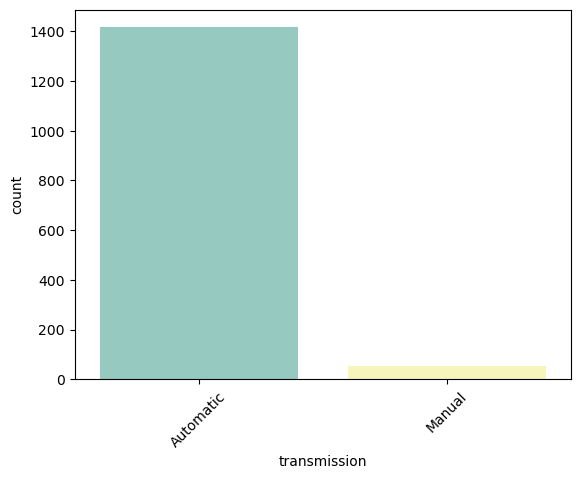

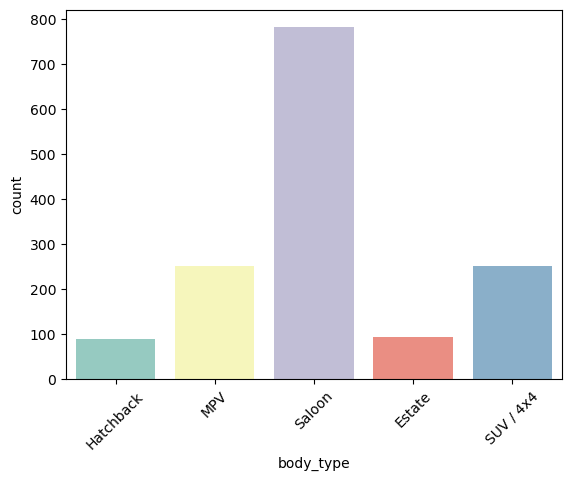

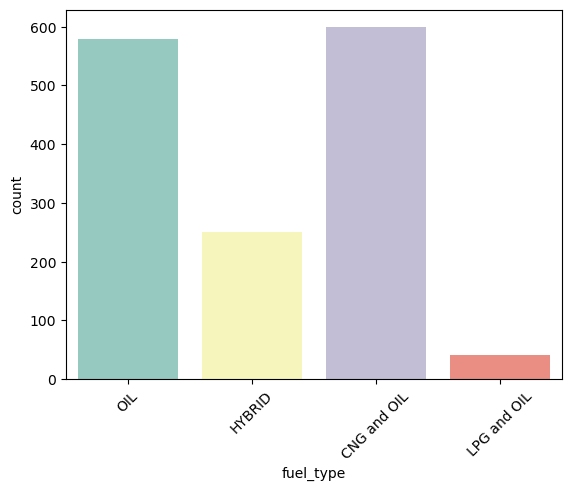

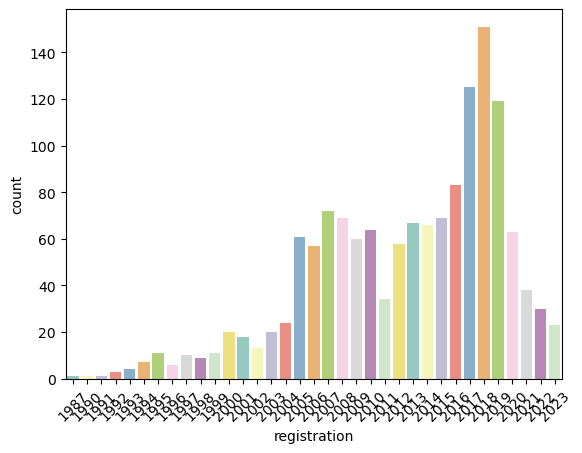

In [26]:
 #Looping through all the features by our y variable - see if there is relationship

features = [ 'transmission','body_type', 'fuel_type','registration']

for f in features:
    sns.countplot(x = f, data = d4, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

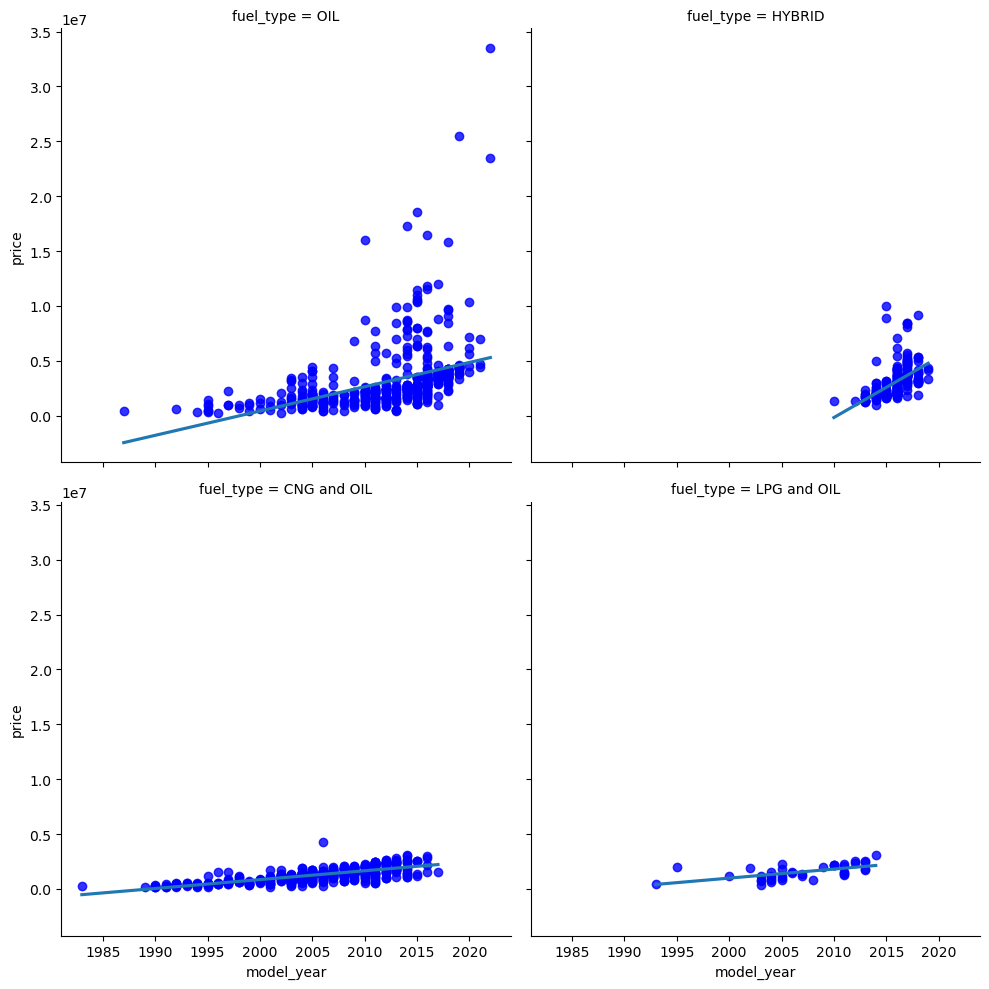

In [27]:
# Visualising a Subset of our data - important featuresz
g = sns.lmplot(x = 'model_year', y = 'price', data = d4, col = 'fuel_type', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'blue'}, ci = False)

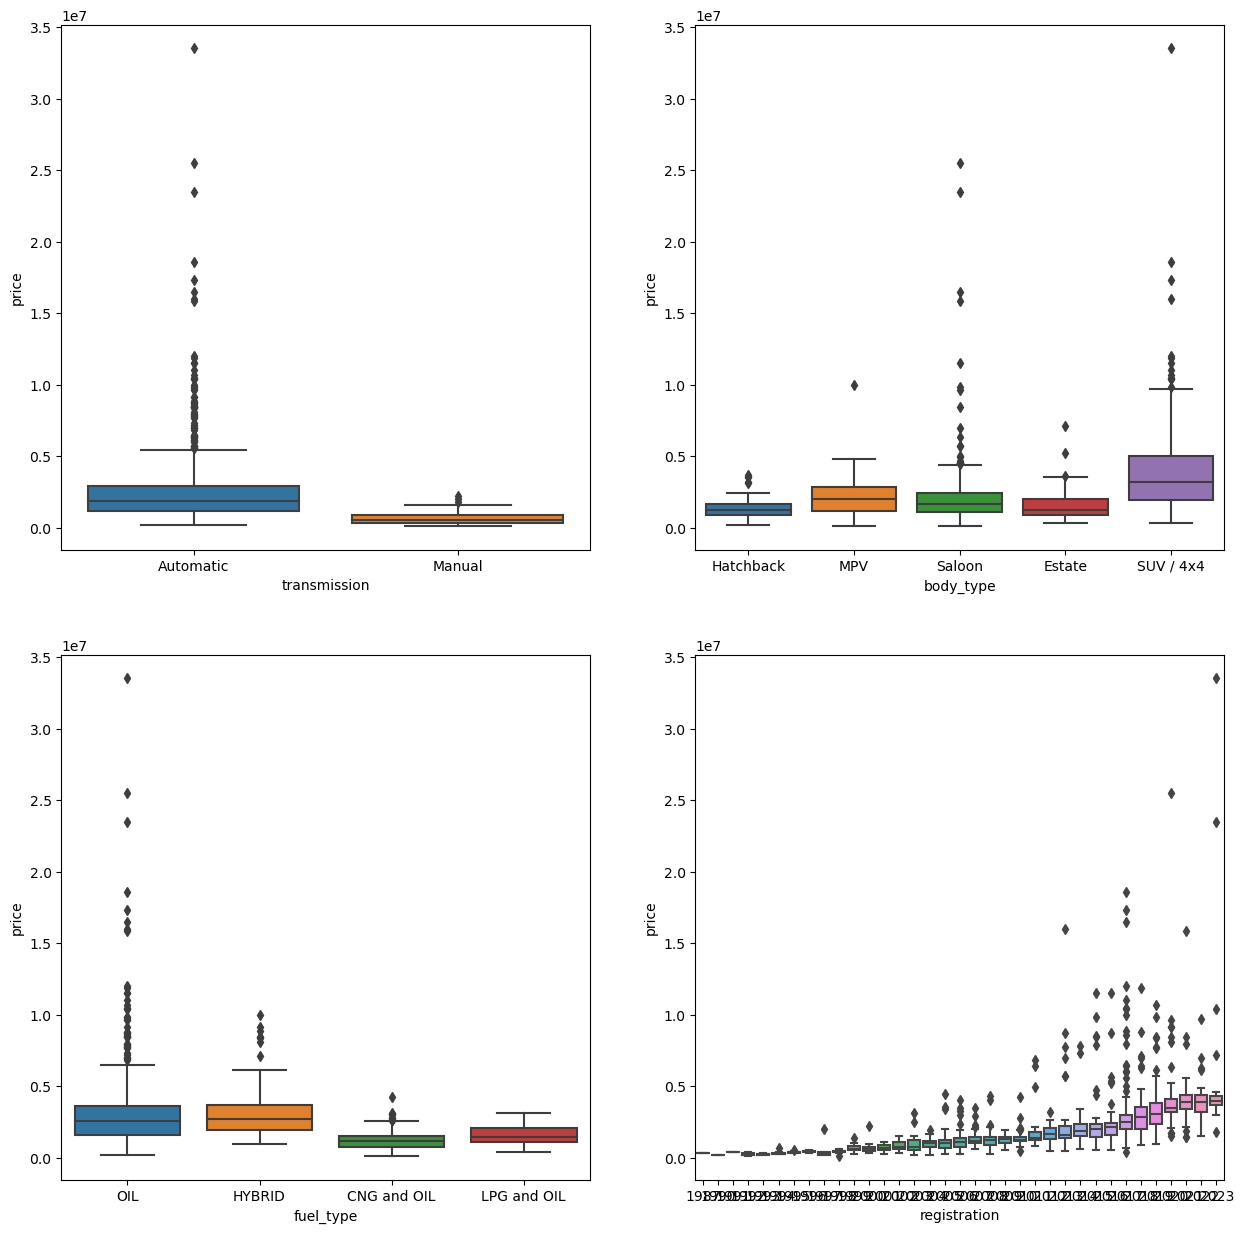

In [28]:
categorical = [ 'transmission','body_type', 'fuel_type','registration']
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = var, y='price', data = d4, ax = subplot)

###### Here we can see that for the transmission automatic cars have the higher average sell price , for body type we can see SUV and MPV have the higher average selling price, in fuel type oil and hybrid system cars have the higher average selling price, In registration we can see the updated registration vehicles have the high average selling rate.

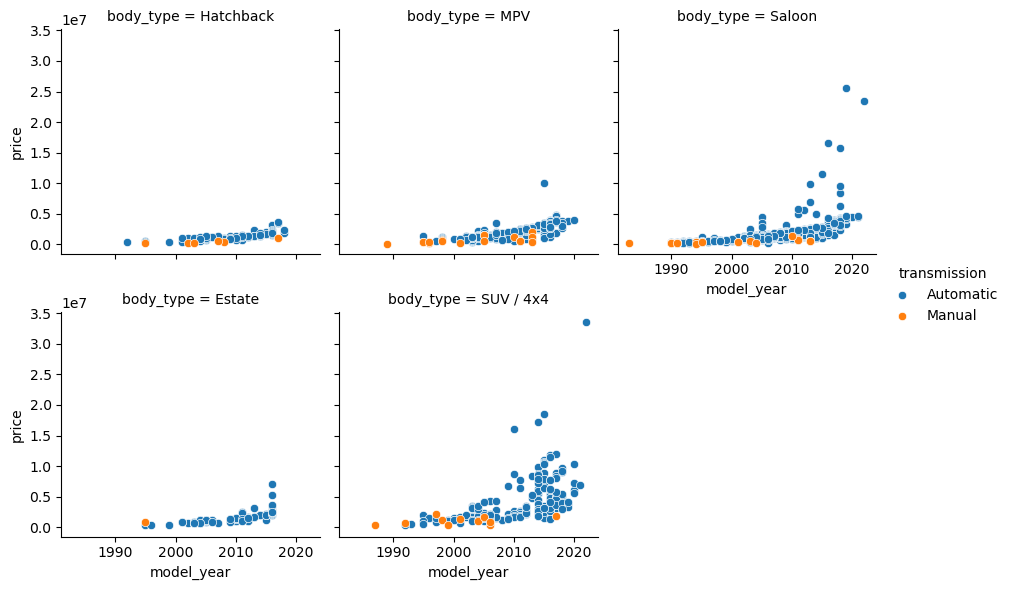

In [29]:
cond_plot = sns.FacetGrid(data=d4, col='body_type', hue = 'transmission', col_wrap=3)
cond_plot.map(sns.scatterplot, 'model_year', 'price');
cond_plot.add_legend()

###### Here in this visualization graph we can see that in each of every body type cars there are two categories of transmission one is automatic and the other one is manual, automatic cars have the high price selling compared to manuals

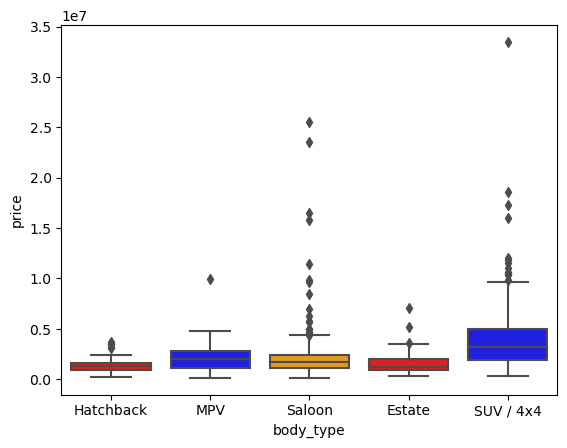

In [30]:
# Investigate the distribution of price by Categorical Variables

pal = ['red', 'blue', 'orange' ]
g = sns.boxplot(x = 'body_type', y = 'price', data = d4, palette = pal)

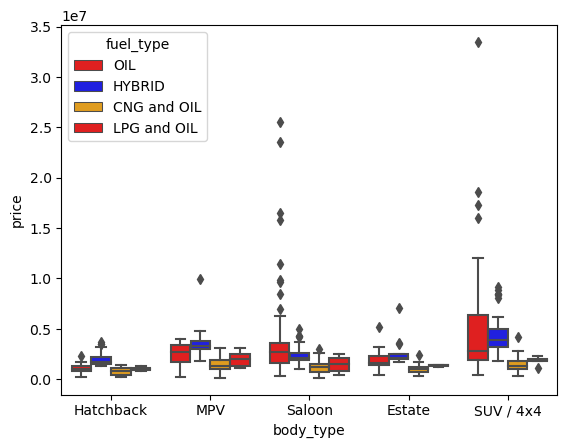

In [31]:
g = sns.boxplot(x = 'body_type', y = 'price', hue = 'fuel_type', data = d4, palette = pal)

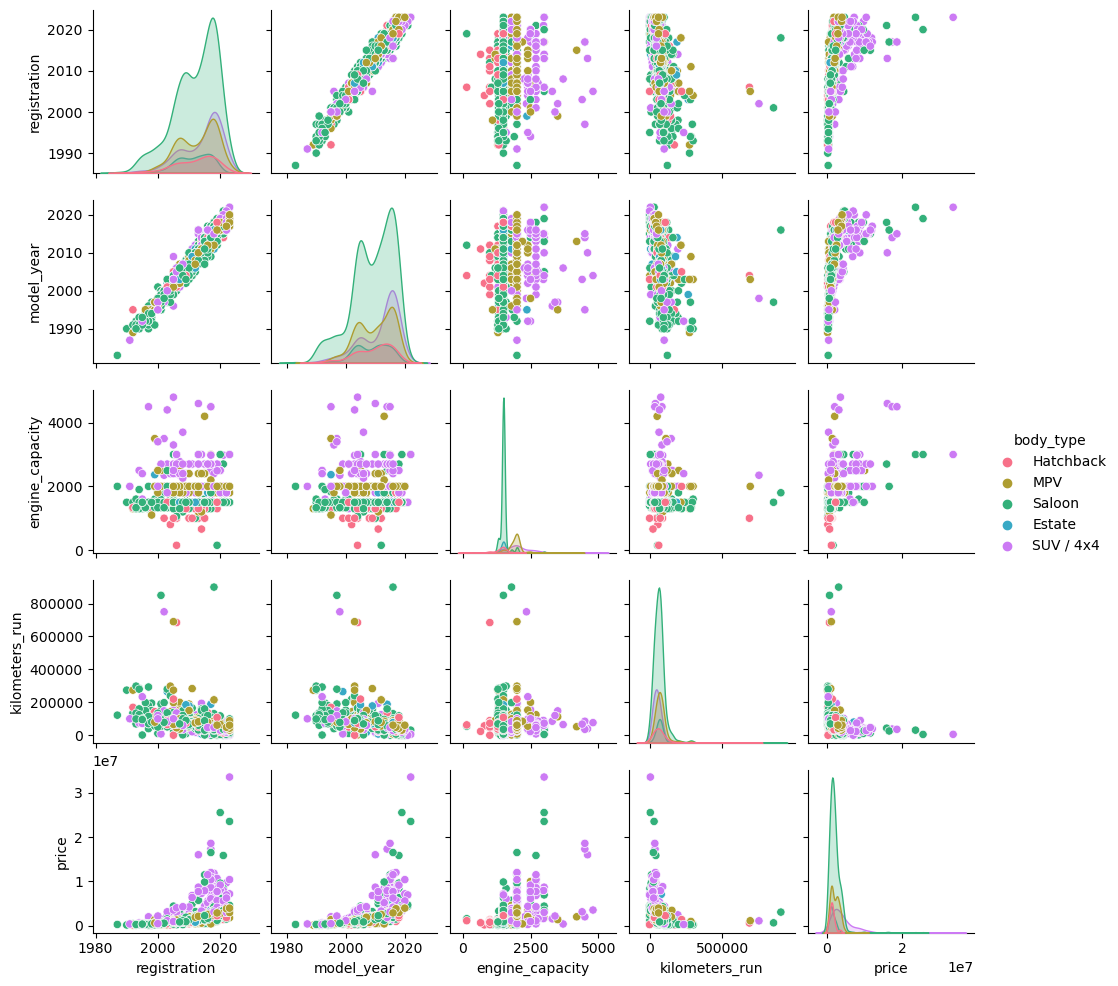

In [32]:
# By Body Type
sns.pairplot(d4,hue = 'body_type',diag_kind = "kde",kind = "scatter",palette = "husl",height= 2)
plt.show()

###### Here we can see that saloon cars have the highest price range compared to other body type cars. We can also see that SUV which have updated registration have higher price range then comes the saloon. There are also outliers present. Updated models have high price range.

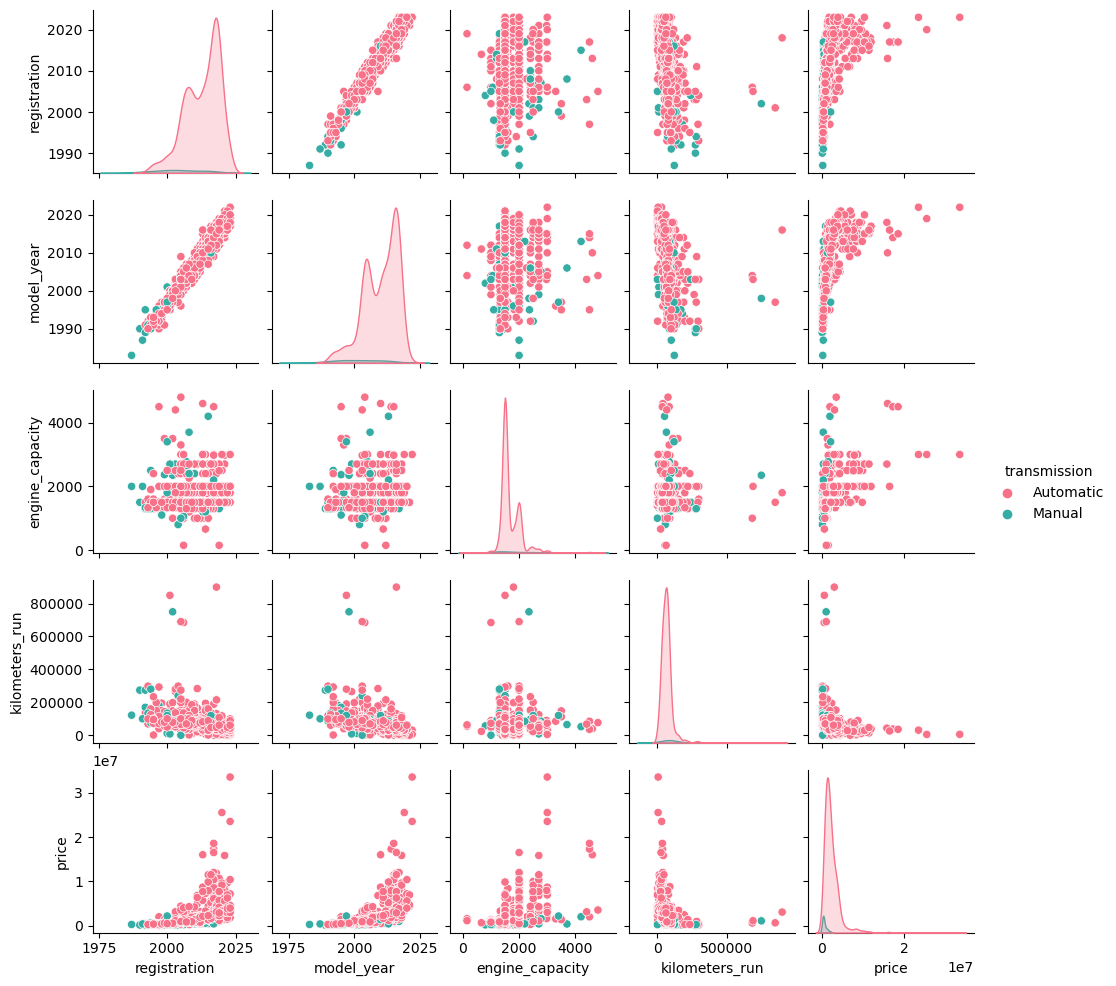

In [33]:
# By Transmission
sns.pairplot(d4,hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=2)
plt.show()

###### Here we can see that automatic cars are the most in our dataset since in Bangladesh automatic cars are most preferrable. Automatic cars have high price than manual cars.

In [34]:
manual = d4[d4['transmission'] == 'Manual']
automatic = d4[d4['transmission'] == 'Automatic']
hue_order_fuel_type = ['CNG and OIL', 'OIL', 'HYBRID', 'LPG and OIL']

Manual


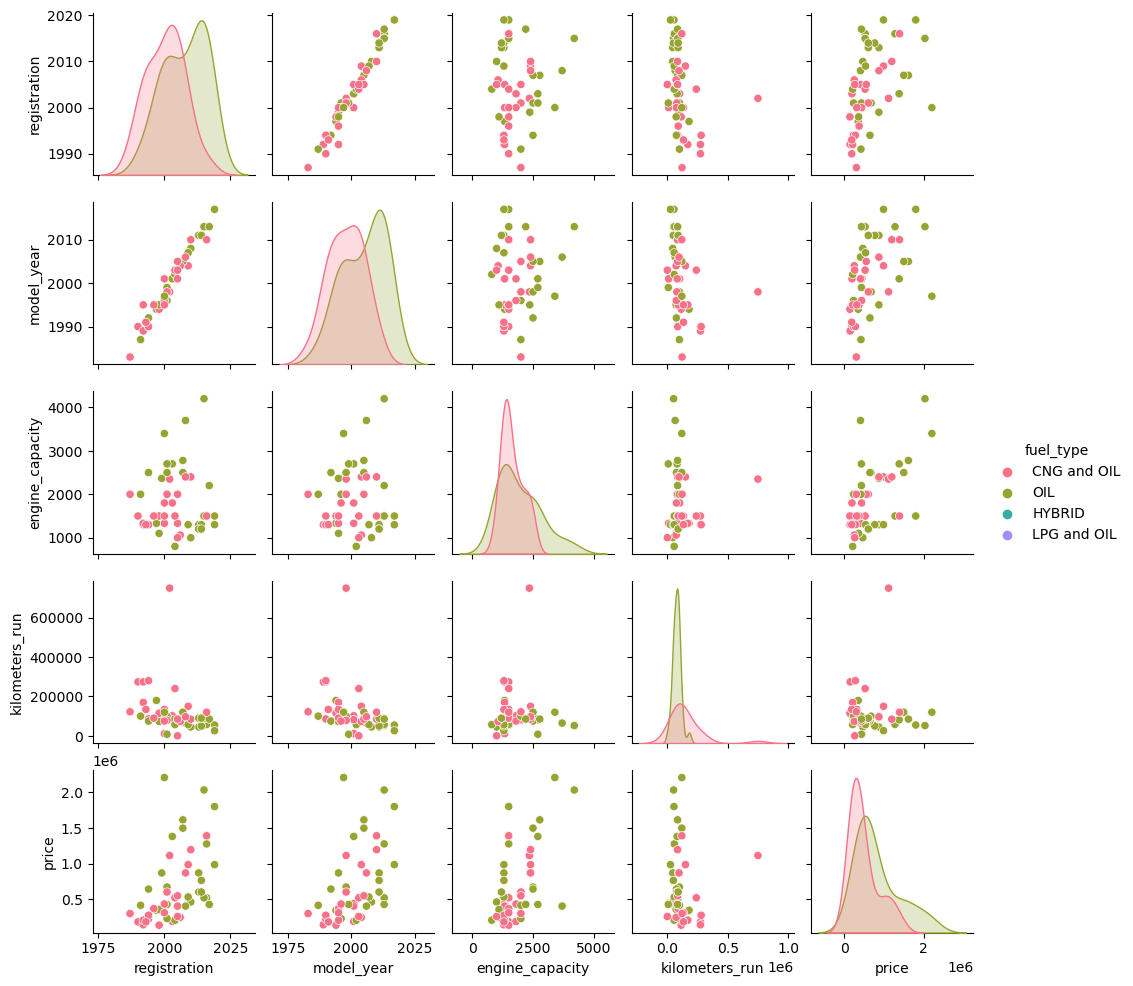

In [35]:
print('Manual')
sns.pairplot(manual,hue ='fuel_type', hue_order = hue_order_fuel_type ,diag_kind = "kde",kind = "scatter",palette = "husl",height=2)
plt.show()

###### Relate with the price.

Automatic


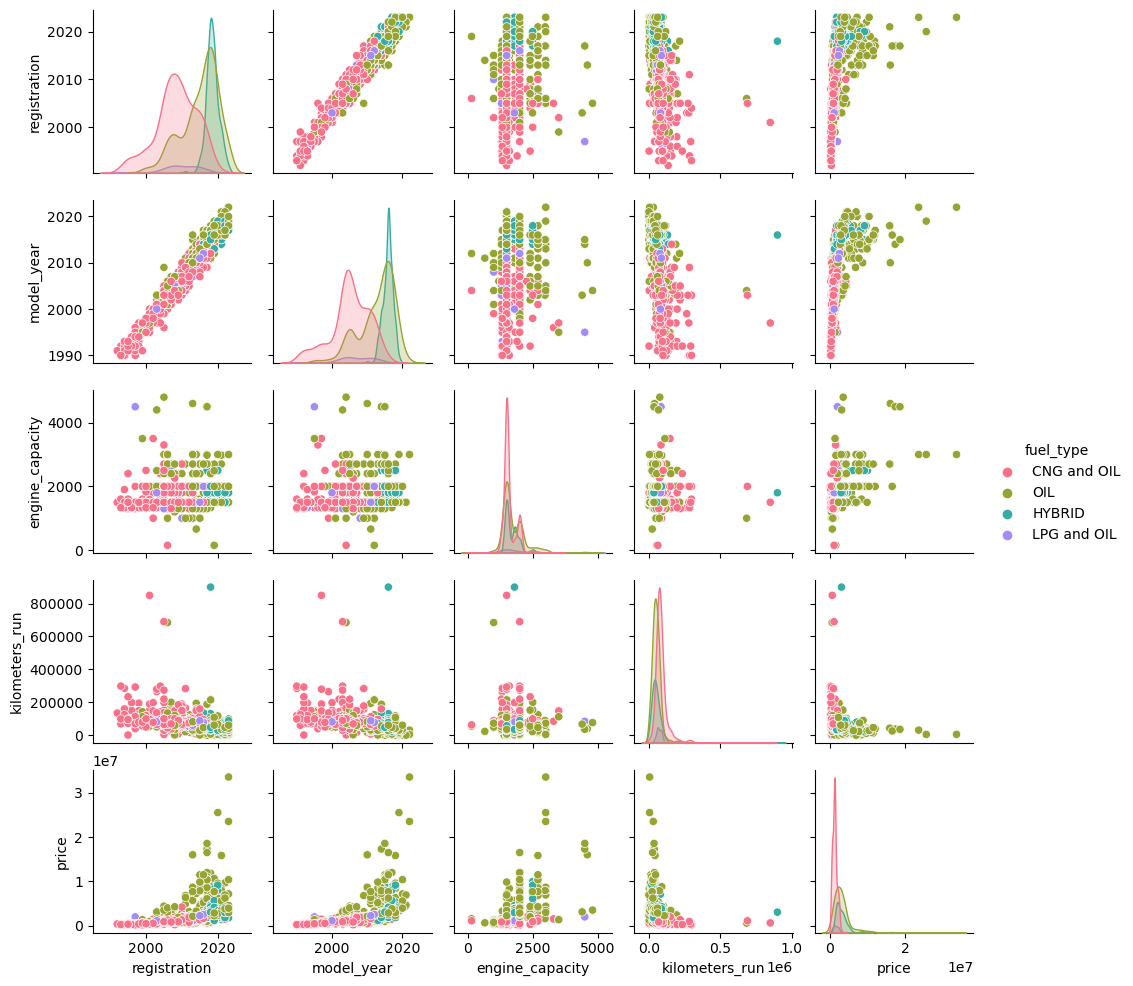

In [36]:
print('Automatic')
sns.pairplot(automatic,hue = 'fuel_type', hue_order = hue_order_fuel_type , diag_kind = "kde" , kind = "scatter" , palette = "husl" , height=2)
plt.show()

###### We can see that the selling price of OIL type cars in both manual and automatic were more spread than 'CNG and Oil', 'OIL', 'HYBRID', 'LPG and OIL' hence getting higher average and range of selling price

## Registration & Selling Price

In [37]:
d4.head()

,brand,car_model,registration,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Vitz,2016,2012,Automatic,Hatchback,OIL,1300,45000,1392000.0
1,Toyota,Hiace,2017,2015,Automatic,MPV,OIL,1500,60000,1125200.0
2,Toyota,Hiace,2018,2016,Automatic,MPV,OIL,2000,46810,2668000.0
3,Toyota,Hiace,2018,2016,Automatic,MPV,OIL,2000,45557,3306000.0
4,Toyota,Prius,2018,2016,Automatic,Saloon,HYBRID,1800,21065,2898840.0


In [38]:
year_mean_manual = d4[d4['transmission']=='Manual'].groupby('registration')['price'].mean()
year_mean_automatic = d4[d4['transmission']=='Automatic'].groupby('registration')['price'].mean()

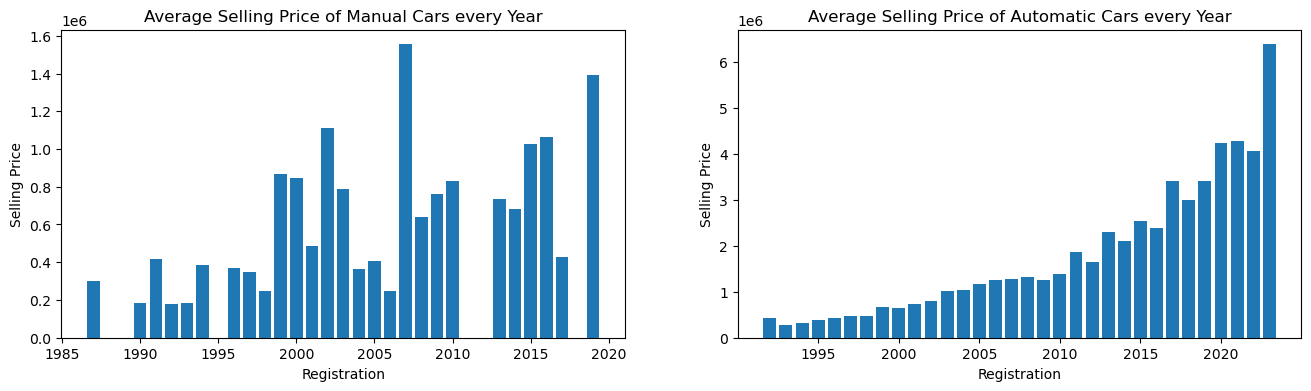

In [39]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Registration')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Registration')
ax[1].set_ylabel('Selling Price')

plt.show()

## Model Year & Kilometers

In [40]:
km_mean = d4.groupby('model_year')['kilometers_run'].mean()

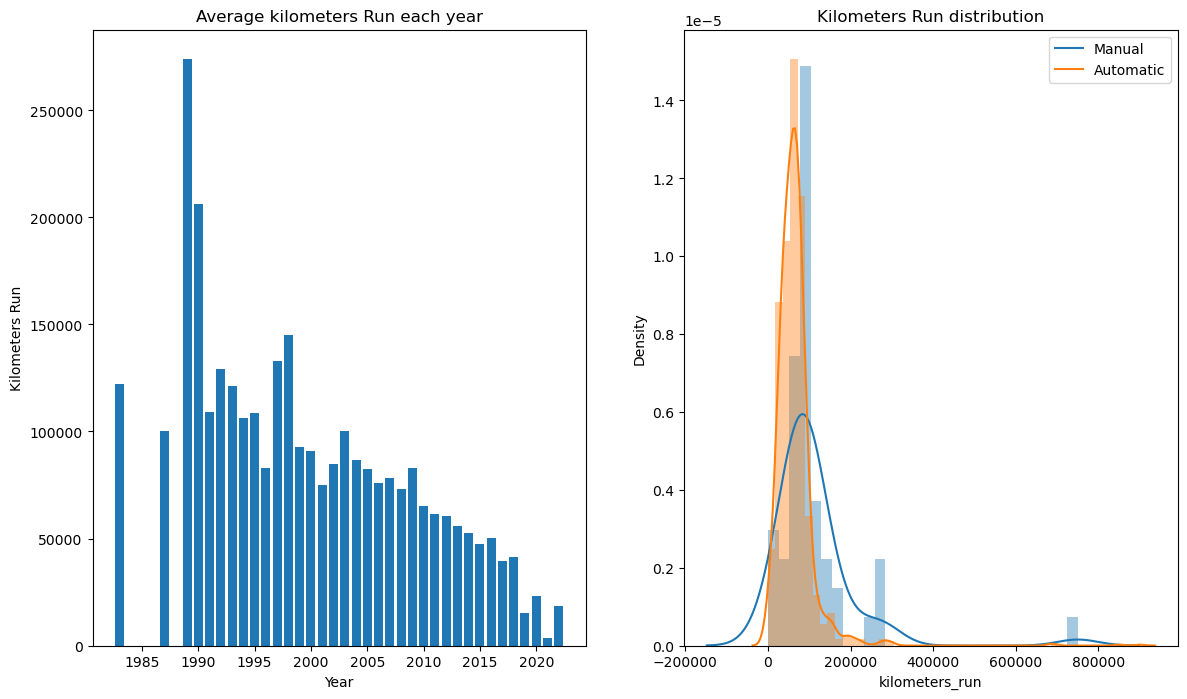

In [41]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,8))

ax[0].bar(km_mean.index,km_mean)
sns.distplot(manual['kilometers_run'],ax=ax[1])
sns.distplot(automatic['kilometers_run'],ax=ax[1])

ax[0].set_title('Average kilometers Run each year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Kilometers Run')

ax[1].set_title('Kilometers Run distribution')
ax[1].legend(['Manual','Automatic'])

plt.show()

###### Here we can see the old model cars have the highest mileage.

## Model Year & Selling Price

In [42]:
year_mean_manual = d4[d4['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic = d4[d4['transmission']=='Automatic'].groupby('model_year')['price'].mean()

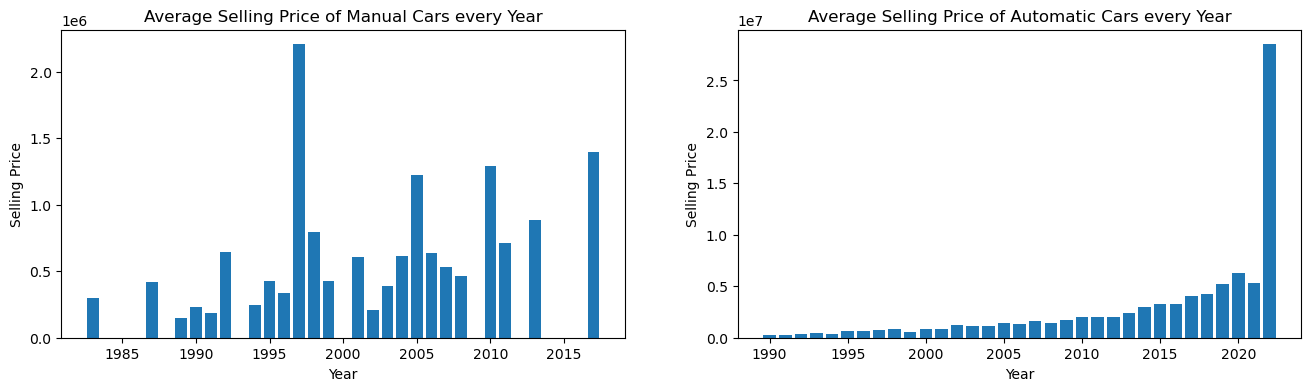

In [43]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

###### We can see that selling price of Automatic cars grows linearly each year whereas manual cars have wavy averages in each year but we can clearly see that selling price grows linearly as well

## Cleaning Data & Removing Outliers

In [44]:
d4 = d4.drop(d4[(d4['price'] > 7500000) & (d4['body_type'] == 'Saloon')].index)
d4 = d4.drop(d4[(d4['price'] > 12500000) & (d4['body_type'] == 'SUV / 4x4')].index)

In [45]:
d4.groupby('transmission').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['model_year'],axis=1)

registration                 engine_capacity                  \
                     mean std   min   max            mean  std  min   max   
transmission                                                                
Automatic            2013   6  1992  2023            1669  352  150  4800   
Manual               2004   8  1987  2019            1813  713  800  4200   

             kilometers_run                         price                   \
                       mean     std  min     max     mean      std     min   
transmission                                                                 
Automatic             66427   52803   22  900000  2233121  1619939  156600   
Manual               111349  108801  200  750000   668771   504116  139200   

                        
                   max  
transmission            
Automatic     12000000  
Manual         2204000

In [46]:
year_mean_manual = d4[d4['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic = d4[d4['transmission']=='Automatic'].groupby('model_year')['price'].mean()

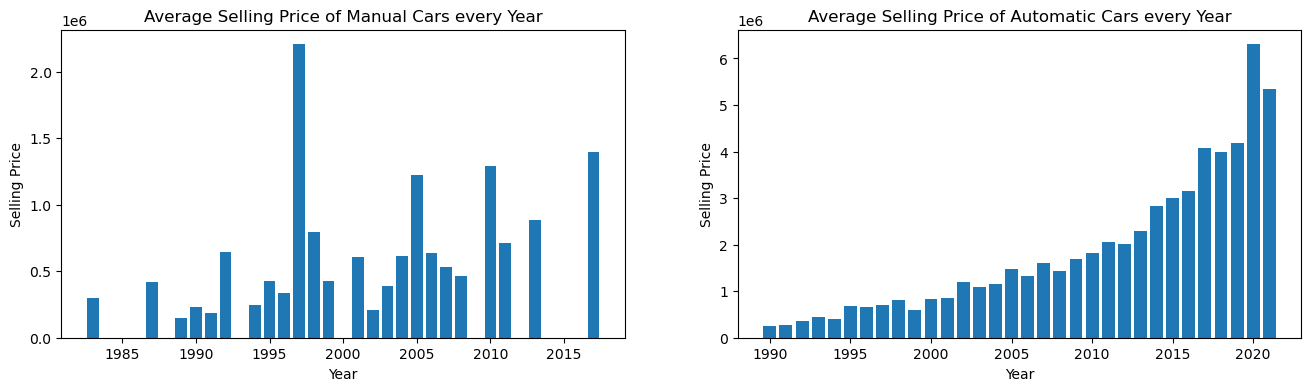

In [47]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

In [48]:
# we can also safely remove the datapoints before 1990 since it produces inconsistency and the data points

d7 = d4[d4['model_year']>1990]

In [49]:
year_mean_manual_price = d7[d7['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic_price = d7[d7['transmission']=='Automatic'].groupby('model_year')['price'].mean()
year_mean_manual_km = d7[d7['transmission']=='Manual'].groupby('model_year')['kilometers_run'].mean()
year_mean_automatic_km = d7[d7['transmission']=='Automatic'].groupby('model_year')['kilometers_run'].mean()

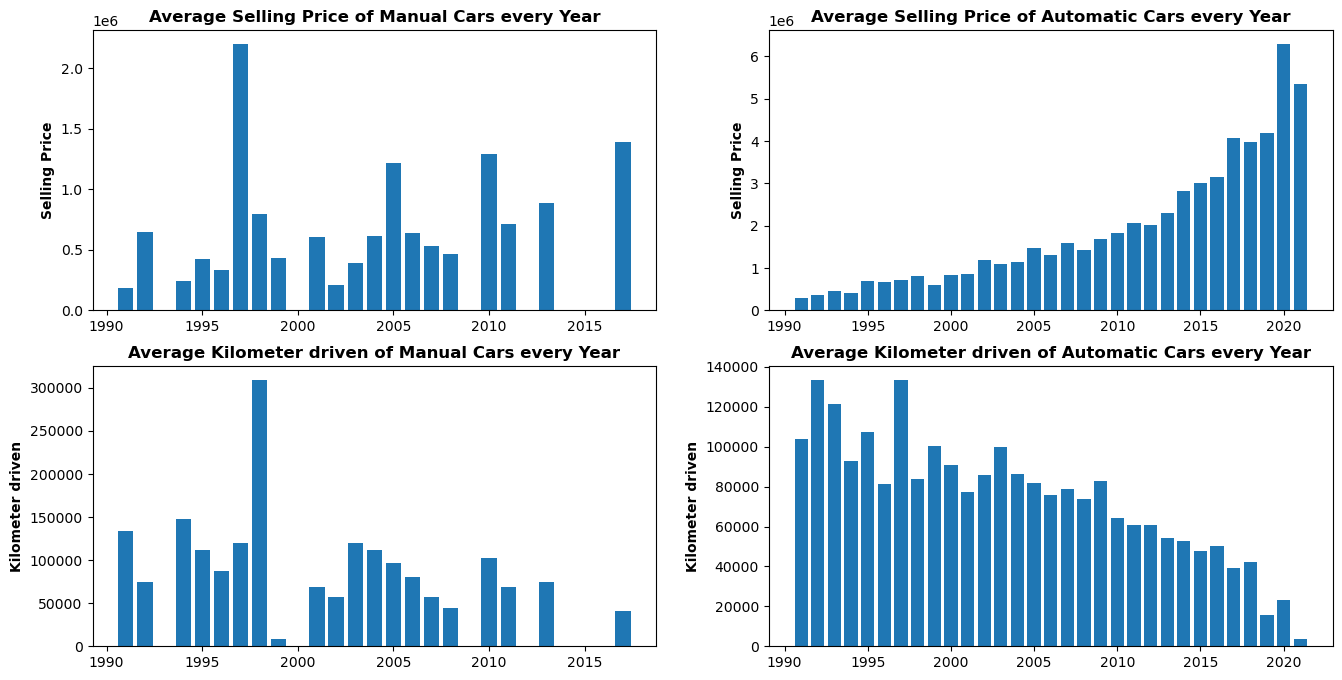

In [50]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

ax[0][0].bar(year_mean_manual_price.index,year_mean_manual_price)
ax[0][1].bar(year_mean_automatic_price.index,year_mean_automatic_price)

ax[1][0].bar(year_mean_manual_km.index,year_mean_manual_km)
ax[1][1].bar(year_mean_automatic_km.index,year_mean_automatic_km)

ax[0][0].set_title('Average Selling Price of Manual Cars every Year' ,fontweight='bold')
ax[0][0].set_ylabel('Selling Price' ,fontweight='bold')

ax[0][1].set_title('Average Selling Price of Automatic Cars every Year' ,fontweight='bold')
ax[0][1].set_ylabel('Selling Price' ,fontweight='bold')

ax[1][0].set_title('Average Kilometer driven of Manual Cars every Year' ,fontweight='bold')
ax[1][0].set_ylabel('Kilometer driven' ,fontweight='bold')

ax[1][1].set_title('Average Kilometer driven of Automatic Cars every Year' ,fontweight='bold')
ax[1][1].set_ylabel('Kilometer driven' ,fontweight='bold')

plt.show()

###### Outliers are removed!

In [51]:
manual = d7[d7['transmission']=='Manual']
automatic = d7[d7['transmission']=='Automatic']

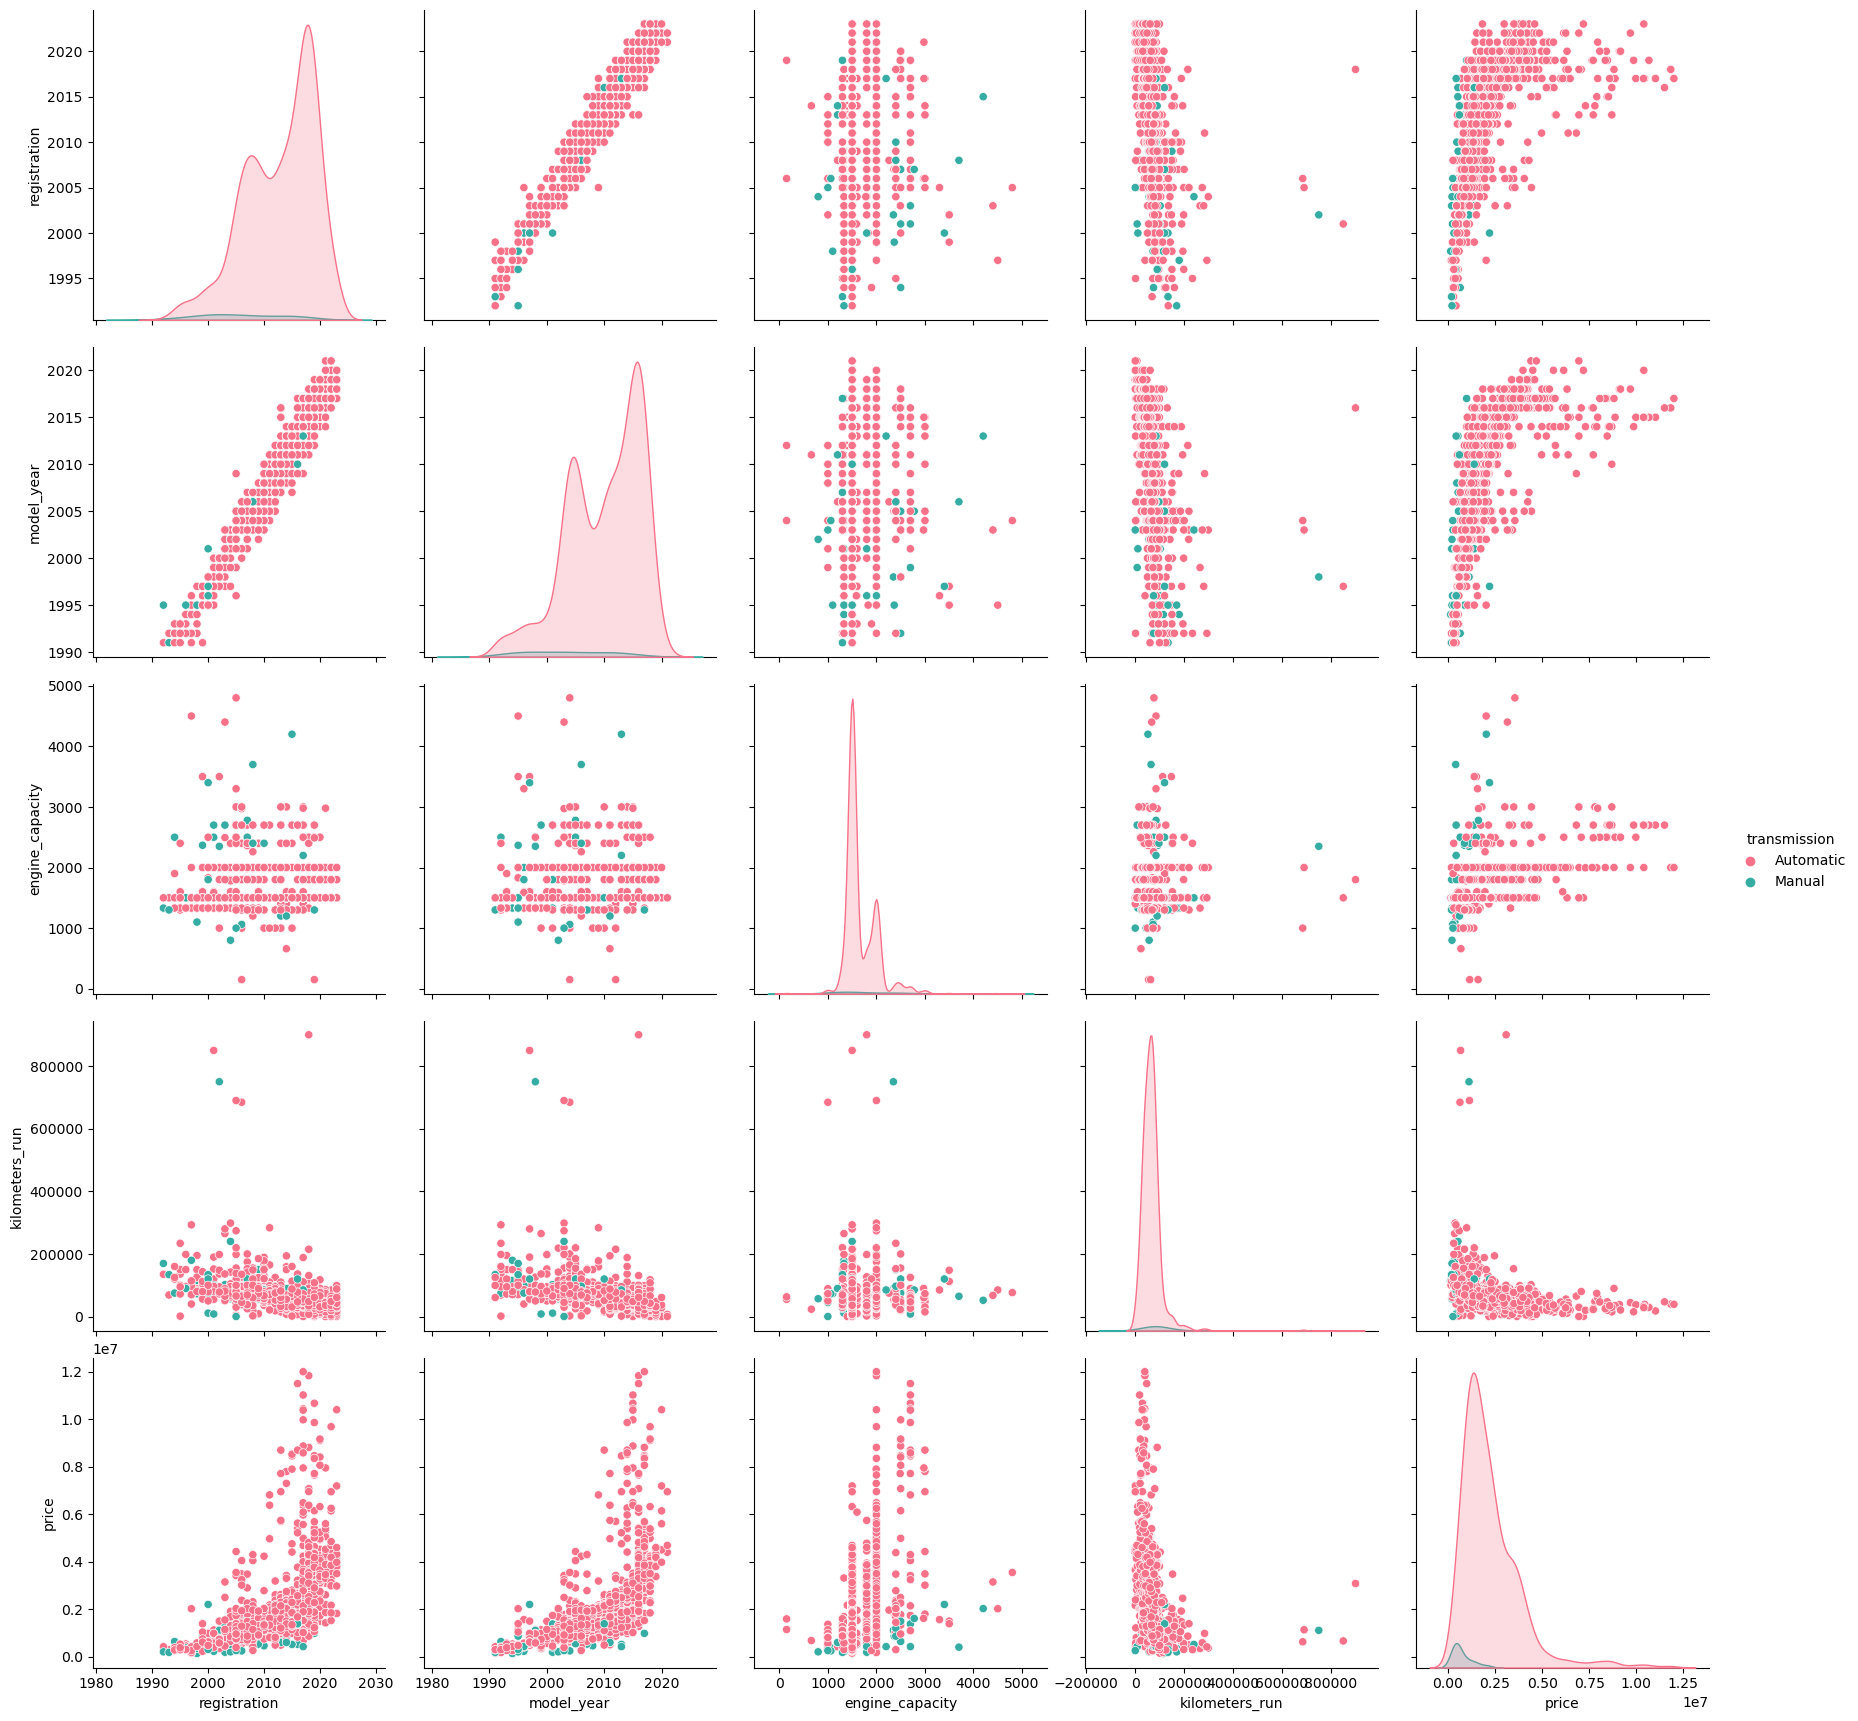

In [52]:
sns.pairplot(d7,hue='transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

###### Skip this graph in report

###### kilometers run decreases whereas selling price increases over the years. We can also see that automatic cars have higher prices than manual cars. Now it's time to build our model.

In [53]:
d7.head()

,brand,car_model,registration,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Vitz,2016,2012,Automatic,Hatchback,OIL,1300,45000,1392000.0
1,Toyota,Hiace,2017,2015,Automatic,MPV,OIL,1500,60000,1125200.0
2,Toyota,Hiace,2018,2016,Automatic,MPV,OIL,2000,46810,2668000.0
3,Toyota,Hiace,2018,2016,Automatic,MPV,OIL,2000,45557,3306000.0
4,Toyota,Prius,2018,2016,Automatic,Saloon,HYBRID,1800,21065,2898840.0


In [54]:
categorical_columns = ['brand','body_type','car_model']
le = LabelEncoder()

for feat in categorical_columns:
    d7[feat] = le.fit_transform(d7[feat].astype(str))



transmission = pd.get_dummies(d7['transmission'])
fuel = pd.get_dummies(d7['fuel_type'])

X = pd.concat([transmission,fuel,d7.drop(['transmission','fuel_type','price'],axis=1)],axis=1)
y = d7['price']

In [55]:
X.tail(20)

,Automatic,Manual,CNG and OIL,HYBRID,LPG and OIL,OIL,brand,car_model,registration,model_year,body_type,engine_capacity,kilometers_run
1478,1,0,0,0,0,1,21,59,2022,2016,3,2000,28000
1479,1,0,0,0,1,0,21,85,2015,2011,4,1500,88000
1480,1,0,0,0,0,1,21,21,2022,2018,4,1500,54994
1481,1,0,0,0,0,1,21,84,2008,2007,3,2700,60000
1482,1,0,0,0,0,1,21,84,2016,2016,3,2700,47000
1483,1,0,0,1,0,0,15,127,2018,2015,3,2000,48000
1484,1,0,1,0,0,0,21,129,2007,2006,4,1300,69000
1485,1,0,0,1,0,0,21,21,2022,2018,4,1500,57260
1486,1,0,0,1,0,0,21,47,2023,2018,2,2000,88159
1487,1,0,0,0,0,1,21,85,2021,2017,4,1500,36000


## Feature Correlation

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1156, 13)
(290, 13)
(1156,)
(290,)


In [57]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,Automatic,Manual,CNG and OIL,HYBRID,LPG and OIL,OIL,brand,car_model,registration,model_year,body_type,engine_capacity,kilometers_run
Automatic,1.000000,-1.000000,0.003605,0.079104,0.028842,-0.073289,0.022063,-0.073300,0.179715,0.168174,0.053540,-0.085199,-0.067646
Manual,-1.000000,1.000000,-0.003605,-0.079104,-0.028842,0.073289,-0.022063,0.073300,-0.179715,-0.168174,-0.053540,0.085199,0.067646
CNG and OIL,0.003605,-0.003605,1.000000,-0.373218,-0.136078,-0.676530,0.269844,-0.089590,-0.537448,-0.587351,0.042466,-0.163357,0.305000
HYBRID,0.079104,-0.079104,-0.373218,1.000000,-0.073073,-0.363292,-0.094475,-0.026122,0.414898,0.418794,-0.105468,0.006087,-0.123912
LPG and OIL,0.028842,-0.028842,-0.136078,-0.073073,1.000000,-0.132459,0.022729,0.023628,-0.065553,-0.065788,-0.004431,0.029398,0.003957
OIL,-0.073289,0.073289,-0.676530,-0.363292,-0.132459,1.000000,-0.206628,0.102290,0.245316,0.292586,0.039140,0.150016,-0.213431
brand,0.022063,-0.022063,0.269844,-0.094475,0.022729,-0.206628,1.000000,-0.140074,-0.061003,-0.106769,-0.106164,-0.116160,0.130151
car_model,-0.073300,0.073300,-0.089590,-0.026122,0.023628,0.102290,-0.140074,1.000000,-0.026749,0.001371,-0.274683,0.169161,0.030542
registration,0.179715,-0.179715,-0.537448,0.414898,-0.065553,0.245316,-0.061003,-0.026749,1.000000,0.972014,-0.004016,-0.030349,-0.397052
model_year,0.168174,-0.168174,-0.587351,0.418794,-0.065788,0.292586,-0.106769,0.001371,0.972014,1.000000,-0.018553,-0.008113,-0.415619


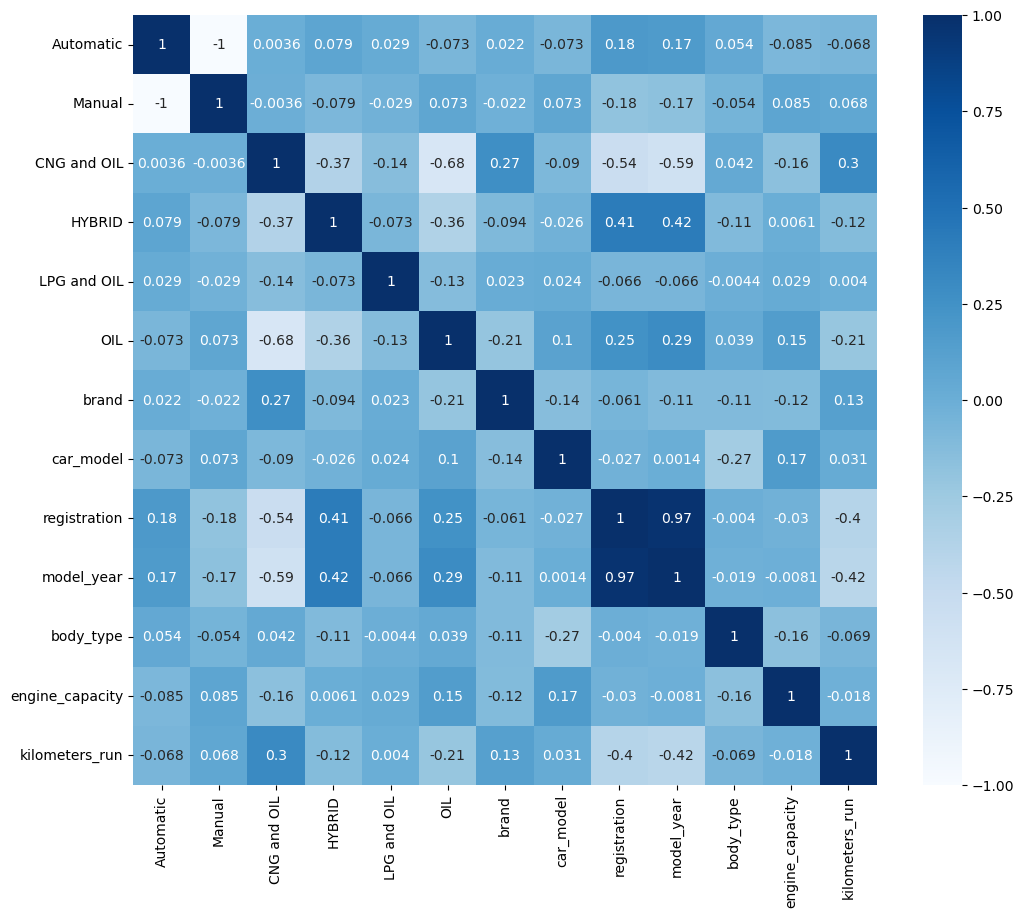

In [58]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "Blues");

In [59]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [60]:
corr_features = correlation(X_train, 0.90) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

2
{'Manual', 'model_year'}


In [61]:
# Now dropping the Manual Transmission Column as it is highly correlated with Automatic Column
X = X.drop(columns = 'Manual')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
X.head(5)

,Automatic,CNG and OIL,HYBRID,LPG and OIL,OIL,brand,car_model,registration,model_year,body_type,engine_capacity,kilometers_run
0,1,0,0,0,1,21,121,2016,2012,1,1300,45000
1,1,0,0,0,1,21,60,2017,2015,2,1500,60000
2,1,0,0,0,1,21,60,2018,2016,2,2000,46810
3,1,0,0,0,1,21,60,2018,2016,2,2000,45557
4,1,0,1,0,0,21,86,2018,2016,4,1800,21065


## Applying Models

In [63]:
scale_vars = ['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL','registration','body_type','engine_capacity',
                'kilometers_run']
scaler = MinMaxScaler()
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [102]:
# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of estimators as needed

# Fit the model to the training data
rf.fit(X_train, y_train)

# Evaluate the model on the test data
rf_score = rf.score(X_test, y_test)

# Print the test score
print("Test Score:", rf_score)

Test Score: 0.8602078827799117


In [65]:
#Using K fold cross validation for Linear Regression:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.57431316, 0.55084043, 0.56225999, 0.57106862, 0.51627058])

## Finding out best model using Grid Search

In [66]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
               'normalize': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random'],
             }
        },
            'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
          }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                #'criterion': ['mse', 'friedman_mse', 'mae'],
                'n_estimators': range(30, 100, 5)
            }
            
        },
            
            
         'ridge_regression': {
           'model': Ridge(),
           'params': {
           'alpha': [0.01, 0.1, 1, 10],
           'normalize': [True, False],
           'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
            }
         },
             
        'elastic_net': {
          'model': ElasticNet(),
          'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'l1_ratio': [0.1, 0.5, 0.7, 0.9],
            'normalize': [True, False]
           }    
          
        },
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror'),
            'params': {
                'n_estimators': range(30, 100, 5),
                'max_depth': range(1, 6, 1),
                'eta': [0.1, 0.01],
                'colsample_bytree': np.linspace(0, 1, 10, endpoint=False)
            }
        },
        'knn_regression': {
            'model': KNeighborsRegressor(),
             'params': {
             'n_neighbors': range(1, 21),
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
            
        }
            
    
  }
    scores = []
    cv = ShuffleSplit(n_splits=8, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

   #Assuming you have X and y defined
a = find_best_model_using_gridsearchcv(X, y)
a.head(8)



,model,best_score,best_params
0,linear_regression,0.611444,{'normalize': False}
1,decision_tree,0.795900,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,lasso,0.611444,"{'alpha': 2, 'selection': 'random'}"
3,random_forest,0.852883,{'n_estimators': 95}
4,ridge_regression,0.611775,"{'alpha': 10, 'normalize': False, 'solver': 's..."
5,elastic_net,0.611801,"{'alpha': 0.01, 'l1_ratio': 0.5, 'normalize': ..."
6,XGBoost,0.867457,"{'colsample_bytree': 0.4, 'eta': 0.1, 'max_dep..."
7,knn_regression,0.429937,"{'algorithm': 'brute', 'n_neighbors': 12, 'wei..."


In [67]:
linear_regression_params = a['best_params'][0]
decision_tree_best_params = a['best_params'][1]
lasso_best_params = a['best_params'][2]
ridge_regression_best_params = a['best_params'][3]
random_forest_best_params = a['best_params'][4]
xg_boost_best_params = a['best_params'][5]
knn_regression_best_params = a['best_params'][6]
elastic_net_best_params = a['best_params'][7]

print(linear_regression_params)
print(decision_tree_best_params)
print(lasso_best_params)
print(ridge_regression_best_params)
print(random_forest_best_params)
print(xg_boost_best_params)
print(knn_regression_best_params)
print(elastic_net_best_params)


{'normalize': False}
{'criterion': 'friedman_mse', 'splitter': 'best'}
{'alpha': 2, 'selection': 'random'}
{'n_estimators': 95}
{'alpha': 10, 'normalize': False, 'solver': 'svd'}
{'alpha': 0.01, 'l1_ratio': 0.5, 'normalize': False}
{'colsample_bytree': 0.4, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 95}
{'algorithm': 'brute', 'n_neighbors': 12, 'weights': 'distance'}


In [68]:
ridge_regression_best_params = {
    'alpha': 0.1,  # Replace with your best alpha value
    'normalize': True,  # Replace with your best normalize value
    'solver': 'auto'  # Replace with your best solver value
}

In [69]:
random_forest_best_params = {
    'n_estimators': 50,  # Replace with your best n_estimators value
    'criterion': 'mse'  # Replace with your best criterion value
    # Add other relevant hyperparameters
}


In [70]:
xg_boost_best_params = {
    'colsample_bytree': 0.7,  # Replace with your best colsample_bytree value
    'eta': 0.1,  # Replace with your best eta value
    'max_depth': 3,  # Replace with your best max_depth value
    'n_estimators': 50  # Replace with your best n_estimators value
    # Add other relevant hyperparameters
}


In [71]:
knn_regression_best_params = {
    'n_neighbors': 5,  # Replace with your best n_neighbors value
    'weights': 'distance',  # Replace with your best weights value
    'algorithm': 'auto'  # Replace with your best algorithm value
    # Add other relevant hyperparameters
}


In [72]:
elastic_net_best_params = {
    'alpha': 0.01,  # Replace with your best alpha value
    'l1_ratio': 0.5,  # Replace with your best l1_ratio value
    'normalize': True  # Replace with your best normalize value
    # Add other relevant hyperparameters
}



In [73]:
from sklearn.model_selection import cross_validate, ShuffleSplit

# Scoring Parameters
scoring = ['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_median_absolute_error']
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

# Define models with their respective best parameters

# Linear Regression
linear_regression_score = cross_validate(
    LinearRegression(normalize=linear_regression_params['normalize']), X, y, scoring=scoring, cv=cv
)

# Decision Tree
decision_tree_score = cross_validate(
    DecisionTreeRegressor(
        splitter=decision_tree_best_params['splitter'],
        criterion=decision_tree_best_params['criterion']
       
    ), X, y, scoring=scoring, cv=cv
)

# Lasso
lasso_score = cross_validate(
    Lasso(
        alpha=lasso_best_params['alpha'],
        selection=lasso_best_params['selection']
    ), X, y, scoring=scoring, cv=cv
)

# Ridge Regression
ridge_regression_score = cross_validate(
    Ridge(
        alpha=ridge_regression_best_params['alpha'],
        normalize=ridge_regression_best_params['normalize'],
        solver=ridge_regression_best_params['solver']
    ), X, y, scoring=scoring, cv=cv
)

# Random Forest
random_forest_score = cross_validate(
    RandomForestRegressor(
        n_estimators=random_forest_best_params['n_estimators'],
        criterion=random_forest_best_params['criterion']
    ), X, y, scoring=scoring, cv=cv
)

# XGBoost
xgboost_score = cross_validate(
    XGBRegressor(
        objective='reg:squarederror',
        colsample_bytree=xg_boost_best_params['colsample_bytree'],
        eta=xg_boost_best_params['eta'],
        max_depth=xg_boost_best_params['max_depth'],
        n_estimators=xg_boost_best_params['n_estimators']
    ), X, y, scoring=scoring, cv=cv
)

# K-Nearest Neighbors (KNN) Regression
knn_score = cross_validate(
    KNeighborsRegressor(
        n_neighbors=knn_regression_best_params['n_neighbors'],
        weights=knn_regression_best_params['weights'],
        algorithm=knn_regression_best_params['algorithm']
    ), X, y, scoring=scoring, cv=cv
)


# Elastic Net
elastic_net_score = cross_validate(
    ElasticNet(
        alpha=elastic_net_best_params['alpha'],
        l1_ratio=elastic_net_best_params['l1_ratio'],
        normalize=elastic_net_best_params['normalize']
    ), X, y, scoring=scoring, cv=cv
)

# Now you have cross-validation scores for all the specified models


In [74]:
def print_score(regressor_type, score):
    print('Regressor Type: ' + regressor_type)
    print('The Standard Deviation on the Testing dataset is:    ', stdev(score['test_r2']))
    print('The Mean R2 Score on the Testing dataset is:    ', score['test_r2'].mean())
    print('The Mean Log of Mean Squared Error on the Testing dataset is: ', math.log(-1 * score['test_neg_mean_squared_error'].mean()))
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(-1 * score['test_neg_root_mean_squared_error'].mean()))
    print('The Mean Log of Mean Absolute Error on the Testing dataset is:  ', math.log(-1 * score['test_neg_median_absolute_error'].mean()))
    print('\n\n')

print_score('Linear Regression', linear_regression_score)
print_score('Decision Tree', decision_tree_score)
print_score('Lasso', lasso_score)
print_score('Ridge Regression', ridge_regression_score)
print_score('Random Forest', random_forest_score)
print_score('XGBoost', xgboost_score)
print_score('KNN Regression', knn_score)
print_score('Elastic Net', elastic_net_score)


Regressor Type: Linear Regression
The Standard Deviation on the Testing dataset is:     0.03474921597660708
The Mean R2 Score on the Testing dataset is:     0.607996937939671
The Mean Log of Mean Squared Error on the Testing dataset is:  27.64214300392015
The Mean Log of Root Mean Squared Error on the Testing dataset is:  13.816620704186498
The Mean Log of Mean Absolute Error on the Testing dataset is:   12.942295265433735



Regressor Type: Decision Tree
The Standard Deviation on the Testing dataset is:     0.037245275624136945
The Mean R2 Score on the Testing dataset is:     0.8146177931454517
The Mean Log of Mean Squared Error on the Testing dataset is:  26.904197340343494
The Mean Log of Root Mean Squared Error on the Testing dataset is:  13.441182414893563
The Mean Log of Mean Absolute Error on the Testing dataset is:   11.999417411720767



Regressor Type: Lasso
The Standard Deviation on the Testing dataset is:     0.03475048090355286
The Mean R2 Score on the Testing dataset is: 

In [75]:
def gen_dictionary(regressor_type, score):
    return {
        'Model': regressor_type,
        'R2 Score(%)': str(round(100 * score['test_r2'].mean(), 2)) + ' +- ' + str(round(100 * stdev(score['test_r2']), 2)),
        'Log Mean Squared(%)': round(math.log(-1 * score['test_neg_mean_squared_error'].mean()), 2),
        'Log Root Mean Squared(%)': round(math.log(-1 * score['test_neg_root_mean_squared_error'].mean()), 2),
        'Log Mean Absolute(%)': round(math.log(-1 * score['test_neg_median_absolute_error'].mean()), 2)
    }

result_dict = []
result_dict.append(gen_dictionary('Linear Regression', linear_regression_score))
result_dict.append(gen_dictionary('Decision Tree', decision_tree_score))
result_dict.append(gen_dictionary('Lasso', lasso_score))
result_dict.append(gen_dictionary('Ridge Regression', ridge_regression_score))
result_dict.append(gen_dictionary('Random Forest', random_forest_score))
result_dict.append(gen_dictionary('XGBoost', xgboost_score))
result_dict.append(gen_dictionary('KNN Regression', knn_score))
result_dict.append(gen_dictionary('Elastic Net', elastic_net_score))

result_df = pd.DataFrame(result_dict)
result_df.head(11)


,Model,R2 Score(%),Log Mean Squared(%),Log Root Mean Squared(%),Log Mean Absolute(%)
0,Linear Regression,60.8 +- 3.47,27.64,13.82,12.94
1,Decision Tree,81.46 +- 3.72,26.90,13.44,12.00
2,Lasso,60.8 +- 3.48,27.64,13.82,12.94
3,Ridge Regression,60.09 +- 3.78,27.66,13.83,12.91
4,Random Forest,86.14 +- 3.15,26.61,13.29,11.86
5,XGBoost,82.6 +- 4.48,26.83,13.40,12.32
6,KNN Regression,41.17 +- 7.43,28.05,14.02,13.11
7,Elastic Net,28.93 +- 3.76,28.24,14.11,13.47


In [76]:
Result = [
    {
        'Model': 'Linear Regression',
        'R2 Score': 100 * linear_regression_score['test_r2'].mean(),
        'Log Mean Squared': math.log(-1 * linear_regression_score['test_neg_mean_squared_error'].mean()),
        'Log Root Mean Squared': math.log(-1 * linear_regression_score['test_neg_root_mean_squared_error'].mean()),
        'Log Mean Absolute': math.log(-1 * linear_regression_score['test_neg_median_absolute_error'].mean())
    },

    {
        'Model': 'Decision Tree',
        'R2 Score': 100 * decision_tree_score['test_r2'].mean(),
        'Log Mean Squared': math.log(-1 * decision_tree_score['test_neg_mean_squared_error'].mean()),
        'Log Root Mean Squared': math.log(-1 * decision_tree_score['test_neg_root_mean_squared_error'].mean()),
        'Log Mean Absolute': math.log(-1 * decision_tree_score['test_neg_median_absolute_error'].mean())
    },
    
    {
        'Model': 'Lasso',
        'R2 Score': 100 * lasso_score['test_r2'].mean(),
        'Log Mean Squared': math.log(-1 * lasso_score['test_neg_mean_squared_error'].mean()),
        'Log Root Mean Squared': math.log(-1 * lasso_score['test_neg_root_mean_squared_error'].mean()),
        'Log Mean Absolute': math.log(-1 * lasso_score['test_neg_median_absolute_error'].mean())
    },
    
    {
        'Model': 'Ridge Regression',
        'R2 Score': 100 * ridge_regression_score['test_r2'].mean(),
        'Log Mean Squared': math.log(-1 * ridge_regression_score['test_neg_mean_squared_error'].mean()),
        'Log Root Mean Squared': math.log(-1 * ridge_regression_score['test_neg_root_mean_squared_error'].mean()),
        'Log Mean Absolute': math.log(-1 * ridge_regression_score['test_neg_median_absolute_error'].mean())
    },
    
    {
        'Model': 'Random Forest',
        'R2 Score': 100 * random_forest_score['test_r2'].mean(),
        'Log Mean Squared': math.log(-1 * random_forest_score['test_neg_mean_squared_error'].mean()),
        'Log Root Mean Squared': math.log(-1 * random_forest_score['test_neg_root_mean_squared_error'].mean()),
        'Log Mean Absolute': math.log(-1 * random_forest_score['test_neg_median_absolute_error'].mean())
    },

    {
        'Model': 'XGBoost',
        'R2 Score': 100 * xgboost_score['test_r2'].mean(),
        'Log Mean Squared': math.log(-1 * xgboost_score['test_neg_mean_squared_error'].mean()),
        'Log Root Mean Squared': math.log(-1 * xgboost_score['test_neg_root_mean_squared_error'].mean()),
        'Log Mean Absolute': math.log(-1 * xgboost_score['test_neg_median_absolute_error'].mean())
    },

    {
        'Model': 'KNN Regression',
        'R2 Score': 100 * knn_score['test_r2'].mean(),
        'Log Mean Squared': math.log(-1 * knn_score['test_neg_mean_squared_error'].mean()),
        'Log Root Mean Squared': math.log(-1 * knn_score['test_neg_root_mean_squared_error'].mean()),
        'Log Mean Absolute': math.log(-1 * knn_score['test_neg_median_absolute_error'].mean())
    },

    {
        'Model': 'Elastic Net',
        'R2 Score': 100 * elastic_net_score['test_r2'].mean(),
        'Log Mean Squared': math.log(-1 * elastic_net_score['test_neg_mean_squared_error'].mean()),
        'Log Root Mean Squared': math.log(-1 * elastic_net_score['test_neg_root_mean_squared_error'].mean()),
        'Log Mean Absolute': math.log(-1 * elastic_net_score['test_neg_median_absolute_error'].mean())
    }
]

result_df = pd.DataFrame(Result)
result_df.head(11)


,Model,R2 Score,Log Mean Squared,Log Root Mean Squared,Log Mean Absolute
0,Linear Regression,60.799694,27.642143,13.816621,12.942295
1,Decision Tree,81.461779,26.904197,13.441182,11.999417
2,Lasso,60.799731,27.642142,13.816620,12.942291
3,Ridge Regression,60.088192,27.661721,13.825913,12.911392
4,Random Forest,86.143422,26.606043,13.292147,11.857765
5,XGBoost,82.602817,26.828548,13.403817,12.318104
6,KNN Regression,41.166914,28.046026,14.018358,13.107574
7,Elastic Net,28.928654,28.238782,14.114976,13.470523


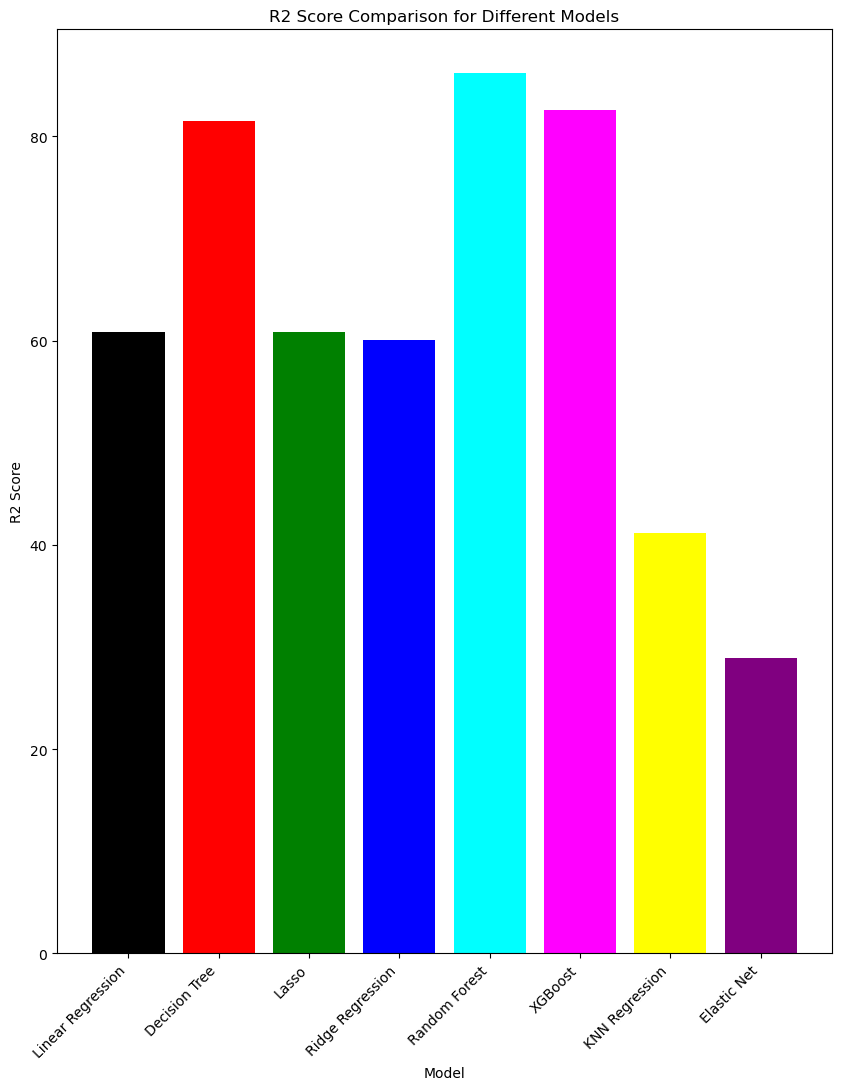

In [77]:
import matplotlib.pyplot as plt

# Define a list of colors for each model
colors = ['black', 'red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'purple']

plt.figure(figsize=(10, 12))
plt.bar(result_df["Model"], result_df["R2 Score"], color=colors)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Score Comparison for Different Models")
plt.xticks(rotation=45, ha="right")

plt.show()




<AxesSubplot:xlabel='Model'>

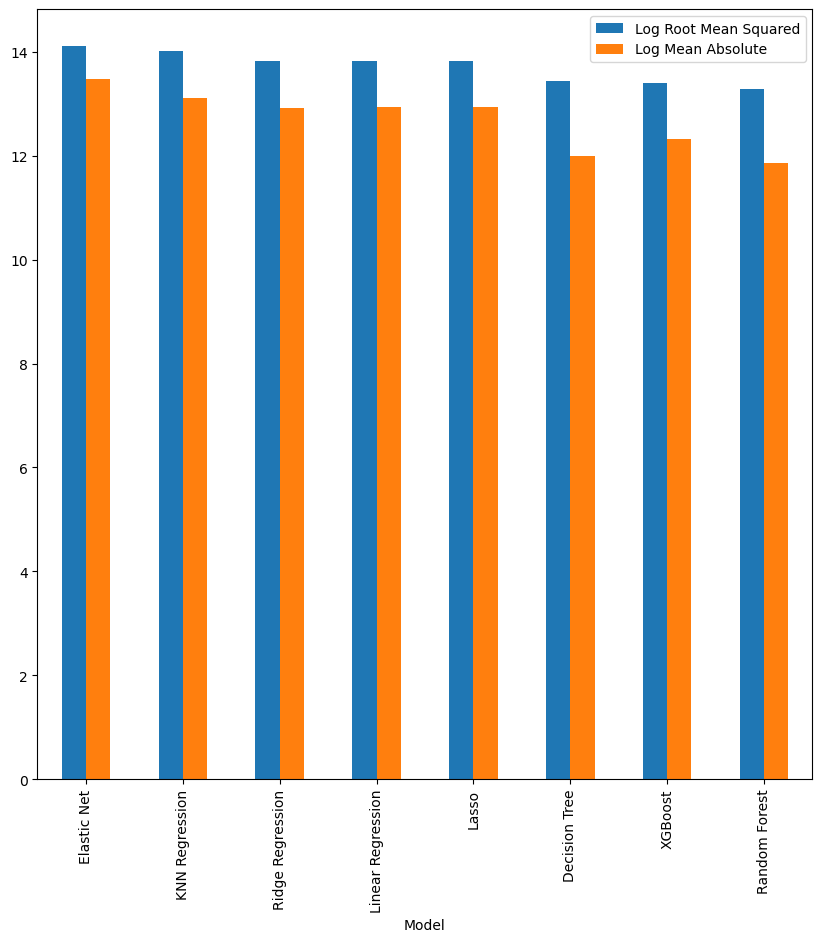

In [78]:
result_df = result_df.sort_values("R2 Score")
result_df.plot(x = "Model", y=["Log Root Mean Squared", 'Log Mean Absolute'], kind="bar",figsize=(10,10))

In [79]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model with the best hyperparameters
random_forest_model = RandomForestRegressor(
    n_estimators=random_forest_best_params['n_estimators'],
    criterion=random_forest_best_params['criterion']
    # Add other hyperparameters as needed
)

# Train the Random Forest model on the training data
random_forest_model.fit(X_train, y_train)

# Evaluate the model's performance on the test data
random_forest_score = random_forest_model.score(X_test, y_test)

print("Random Forest R2 Score:", random_forest_score)


Random Forest R2 Score: 0.8619113923662262


## Saving Model

In [80]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Define the Random Forest model with the best hyperparameters
random_forest_model = RandomForestRegressor(
    n_estimators=random_forest_best_params['n_estimators'],
    criterion=random_forest_best_params['criterion']
    # Add other hyperparameters as needed
)

# Train the Random Forest model on your data
random_forest_model.fit(X_train, y_train)

# Save the Random Forest model to a file
joblib.dump(random_forest_model, 'random_forest_model.pkl')

# Save the scaler
scaler_filename = "min_max_scaler.save"
joblib.dump(scaler, scaler_filename)


['min_max_scaler.save']

In [81]:
X_train.head()
X_train.columns

Index(['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL', 'brand',
       'car_model', 'registration', 'model_year', 'body_type',
       'engine_capacity', 'kilometers_run'],
      dtype='object')

In [4]:
import joblib  # Add this import statement

from sklearn.ensemble import RandomForestRegressor

def get_price(transmission, fuel_type, brand, car_model, registration, model_year, body_type, engine_capacity, kilometers_run):
    brand_dict = {'Chevrolet': 0, 'Ford': 1, 'Haval': 2, 'Honda': 3, 'Hyundai': 4, 'Kia': 5, 'Mahindra': 6, 'Maruti Suzuki': 7, 'Mazda': 8, 'Mitsubishi': 9, 'Nissan': 10, 'Proton': 11, 'SsangYong': 12, 'Suzuki': 13, 'Tata': 14, 'Toyota': 15}
    body_type_dict = {'Estate': 0, 'Hatchback': 1, 'MPV': 2, 'SUV / 4x4': 3, 'Saloon': 4}
    car_model_dict = {'320i': 0, '5 Series': 1, 'APV': 2, 'Accent': 3, 'Allion': 4, 'Alphard': 5, 'Alto': 6, 'Alto 800': 7, 'Aqua': 8, 'Attrage': 9, 'Auris': 10, 'Avanza': 11, 'Axela': 12, 'Axio': 13, 'Bluebird': 14, 'C-Class': 15, 'C-HR': 16, 'CR-V': 17, 'CR-Z': 18, 'CX-7': 19, 'Cami': 20, 'Camry': 21, 'Carina': 22, 'Carryboy': 23, 'Cefiro': 24, 'City': 25, 'CityRover': 26, 'Civic': 27, 'Coaster': 28, 'Corolla': 29, 'Corona': 30, 'Corsa': 31, 'Crown': 32, 'Discovery': 33, 'Dualis': 34, 'Dyna': 35, 'E 250': 36, 'Eco Sport': 37, 'Esquire': 38, 'Estima': 39, 'Fielder': 40, 'Fiesta': 41, 'Fit': 42, 'GLA-Class': 43, 'GLX': 44, 'Grace': 45, 'H-RV': 46, 'H1': 47, 'H2': 48, 'HR-V': 49, 'Harrier': 50, 'Hiace': 51, 'Hilux': 52, 'Ikon': 53, 'Indigo Ecs': 54, 'Insight': 55, 'Juke': 56, 'Kluger': 57, 'Kyron': 58, 'Lancer': 59, 'Land Cruiser': 60, 'LiteAce': 61, 'MPV': 62, 'MR2': 63, 'Mark II': 64, 'Murano': 65, 'NX': 66, 'Noah': 67, 'Note': 68, 'Other Model': 69, 'Outlandar': 70, 'Outlander': 71, 'Pajero': 72, 'Passo': 73, 'Pathfinder': 74, 'Prado': 75, 'Premio': 76, 'Prius': 77, 'Probox': 78, 'Q5': 79, 'RAV4': 80, 'RVR': 81, 'RX': 82, 'RX-8': 83, 'Ractis': 84, 'Raum': 85, 'RunX': 86, 'Rush': 87, 'S660': 88, 'Santa Fe': 89, 'Satria': 90, 'Sienta': 91, 'Sonata': 92, 'Spacio': 93, 'Spark': 94, 'Sportage': 95, 'Sprinter': 96, 'Starlet': 97, 'Starlet Soleil': 98, 'Succeed': 99, 'Sunny': 100, 'Swift': 101, 'Terrano': 102, 'Tiida': 103, 'TownAce': 104, 'Tucson': 105, 'Urvan': 106, 'V6': 107, 'Vezel': 108, 'Vista': 109, 'Vitz': 110, 'WagonR': 111, 'Wish': 112, 'X Assista': 113, 'X-Trail': 114, 'XJ': 115, 'Yaris': 116, 'ist': 117, 'l200': 118, 'l300': 119}
    features = ['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL', 'brand', 'car_model', 'registration', 'model_year', 'body_type', 'engine_capacity', 'kilometers_run']
    scale_vars = ['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL', 'registration', 'body_type', 'engine_capacity', 'kilometers_run']

    # deciding fuel type
    cng_and_oil = 0
    hybrid = 0
    lpg_and_oil = 0
    oil = 0
    if fuel_type == 'CNG and OIL':
        cng_and_oil = 1
    elif fuel_type == 'HYBRID':
        hybrid = 1
    elif fuel_type == 'LPG and OIL':
        lpg_and_oil = 1
    elif fuel_type == 'OIL':
        oil = 1

    # deciding transmission type
    if transmission == '1':
        automatic = 1
    else:
        automatic = 0

    test_array = [automatic, cng_and_oil, hybrid, lpg_and_oil, oil, brand_dict[brand], car_model_dict[car_model], registration, model_year, body_type_dict[body_type], engine_capacity, kilometers_run]
    test_array = np.array(test_array)  # convert into a numpy array
    test_array = test_array.reshape(1, -1)  # reshape
    test_df = pd.DataFrame(test_array, columns=features)

    # scaling data
    scaler_filename = "min_max_scaler.save"
    scaler = joblib.load(scaler_filename)
    scaler.clip = False
    test_df[scale_vars] = scaler.transform(test_df[scale_vars])

    # declare path where you saved your model
    model_path = 'random_forest_model.pkl'
    # open file
    file = open(model_path, "rb")
    # load the trained model
    trained_model = joblib.load(file)

    prediction = int(trained_model.predict(test_df))
    return prediction


In [5]:
price = get_price('1','CNG & OIL','Toyota','Corolla',2005, 2001 ,'Saloon',1500 , 110000)
print(price)

677756


In [8]:
price = get_price('1','OIL','Toyota','Allion',2019, 2016 ,'Saloon',1500 , 50000)
print(price)

3340416
